In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# K_means

## Hard K-means Exersize 1

In [2]:
# make an array named x with n*d size (n samples and d features)
# make a cluster identities named y with size n
# u can do it like : n=300, d=2, k=3
N = 300
D = 2
K = 3
mu1 = np.array([0, 0])
mu2 = np.array([5, 5])
mu3 = np.array([0, 5])
X = np.zeros((N, D))
X[:100, :] = np.random.randn(100, D) + mu1
X[100:200, :] = np.random.randn(100, D) + mu2
X[200:, :] = np.random.randn(100, D) + mu3
Y = np.array([0]*100 + [1]*100 + [2]*100)
X.shape

(300, 2)

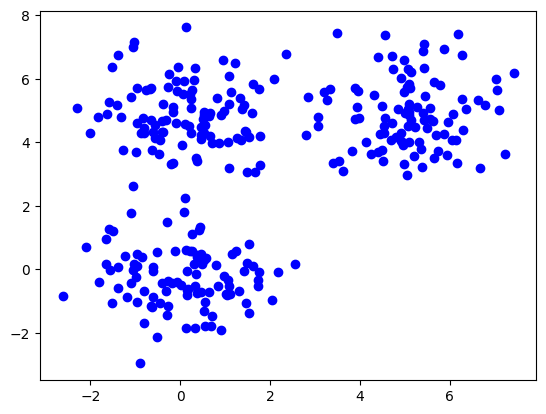

In [3]:
plt.plot(X[:, 0], X[:, 1], "bo")
plt.show()

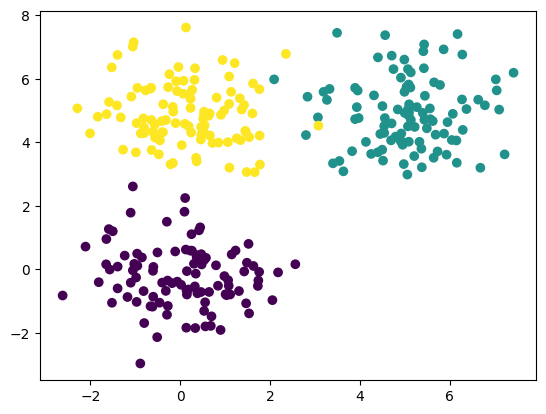

In [4]:
plt.scatter(X[: ,0], X[: ,1], c=Y)

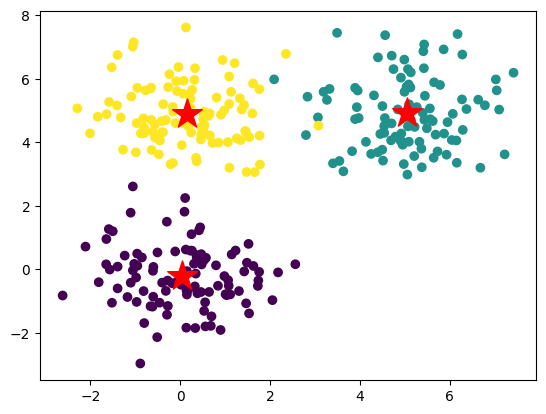

In [5]:
# calculate the mean with each of the clusters 
# do it by loop through each of cluster values
# so at the first, u should find all the points that belong to each clusters 
means = np.zeros((K,D))
means[0,: ] = X[Y==0].mean(axis=0)
means[1,: ] = X[Y==1].mean(axis=0)
means[2,: ] = X[Y==2].mean(axis=0)
plt.scatter(X[: ,0], X[: ,1], c=Y)
plt.scatter(means[:, 0], means[:, 1], s=500, color='red', marker='*')

## Hard K-means Exercise 2

In [6]:
# in this practice you have your X and Means and want to find Y
# generate means array of size k*d
# n=300, d=2, k=3
# generate X of size n*d (better make sense)
# output: cluster identities (of size n)
N = 300
D = 2
K = 3

means = np.array([[0, 0],
                 [5, 5],
                 [0, 5]])


X = np.zeros((N, D))
X[:100, :] = np.random.randn(100, D) + means[0]
X[100:200, :] = np.random.randn(100, D) + means[1]
X[200: ,:] = np.random.randn(100, D) + means[2]

Y = np.zeros(N)
for n in range(N):
    closest_k = -1
    min_dist = float('inf')
    for k in range(K):
        d = (X[n] - means[k]).dot(X[n] - means[k])
        if d < min_dist:
            min_dist = d
            closest_k = k
    Y[n] = closest_k

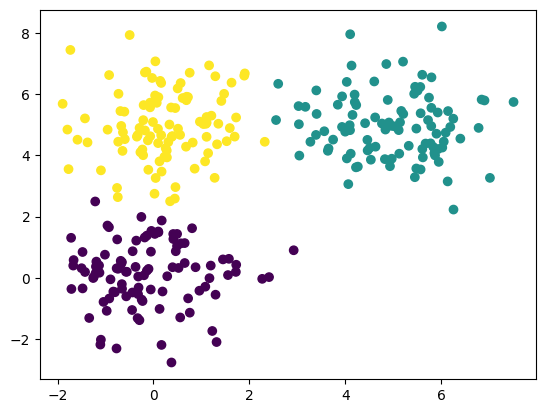

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

## Hard K-means Exercise 3

In [8]:
# this part is the last part 
# we should put togather last to parts and make them work to gather
# to find the real centroid cus we just have data and 
# we dont have any imformation about Y or means 
# we should write a code that put both togather 

# start by initializing centroid randomly chosen from X
# then we iterate through last 2 steps

N = N
D = D 
K = K
X = X

# randomly choose centroids
rng = np.random.default_rng()
cluster_centers = rng.choice(X, 3, replace=False)

max_iters = 20
cluster_identities = np.zeros(N)
saved_cluster_identities = []
all_losses = []
min_dists = np.zeros(N)

for i in range(max_iters):

    old_cluster_identities = cluster_identities.copy()
    saved_cluster_identities.append(old_cluster_identities)

    # step 1
    for n in range(N):
        loss = 0
        closest_k = -1
        min_dist = float('inf')
        for k in range(K):
            d = (X[n] - cluster_centers[k]).dot(X[n] - cluster_centers[k])
            if d < min_dist:
                min_dist = d
                closest_k = k
        cluster_identities[n] = closest_k
        min_dists[n] = min_dist
        all_losses.append(min_dists.sum())
        

    # step 2
    for k in range(K):
        cluster_centers[k,:] = X[cluster_identities == k].mean(axis=0)

    if np.all(old_cluster_identities == cluster_identities):
        print(f"Converaged on step {i}")
        break


Converaged on step 5


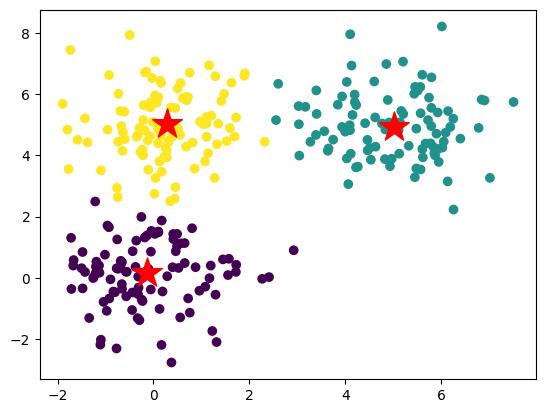

In [9]:
plt.scatter(X[: ,0], X[: ,1], c=Y)
plt.scatter(cluster_centers[:, 0],
            cluster_centers[:, 1],
            s=500, color='red', marker='*')

C:\Users\sablab\AppData\Local\Temp\ipykernel_3504\1409467189.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(M, 1, i+1)


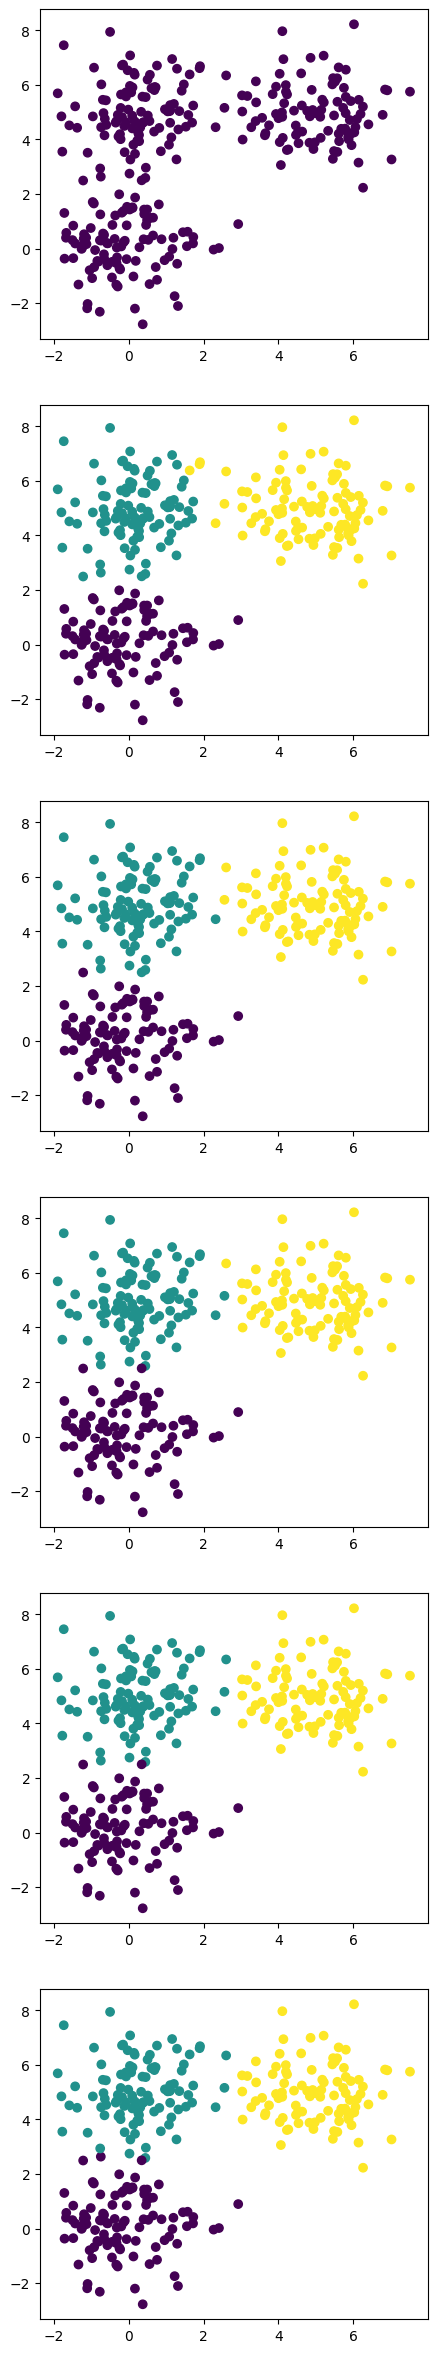

In [10]:
M = len(saved_cluster_identities)
M
fig, ax = plt.subplots(figsize=(5, 5*M))
for i in range(M):
    plt.subplot(M, 1, i+1)
    Y = saved_cluster_identities[i]
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    

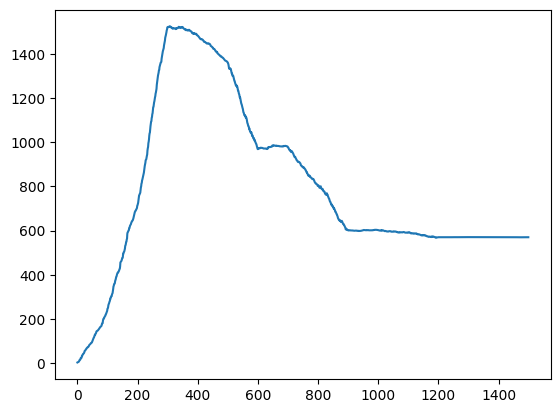

In [23]:
plt.plot(all_losses)

## Soft Kmeans 

In [11]:
N = 900
D = 2
S = 4
mu1 = np.array([0, 0])
mu2 = np.array([S, S])
mu3 = np.array([0, S])
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

In [41]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n, k]*d(M[k], X[n])
    return cost

def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    # mean matrix
    M = np.zeros((K, D))
    # responcibility matrix
    R = np.zeros((N, K))

    for k in range(K):
        M[k] = X[np.random.choice(N)]
        
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                R[n, k] = np.exp(-beta*d(M[k], X[n]))/ np.sum(np.exp(-beta*d(M[k], X[n]))for j in range(K))
                
        # step 2, find new means
        for k in range(K):
            M[k] = R[:, k].dot(X) / R[:, k].sum()

        costs[i] = cost(X, R, M)
        if i>0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
               break

    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    print(i)
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()

C:\Users\sablab\AppData\Local\Temp\ipykernel_3504\388390746.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n, k] = np.exp(-beta*d(M[k], X[n]))/ np.sum(np.exp(-beta*d(M[k], X[n]))for j in range(K))


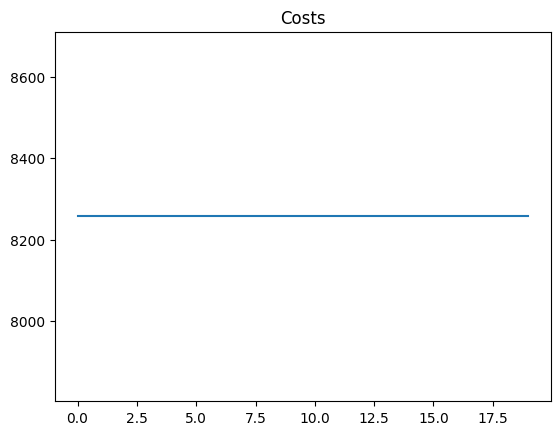

19


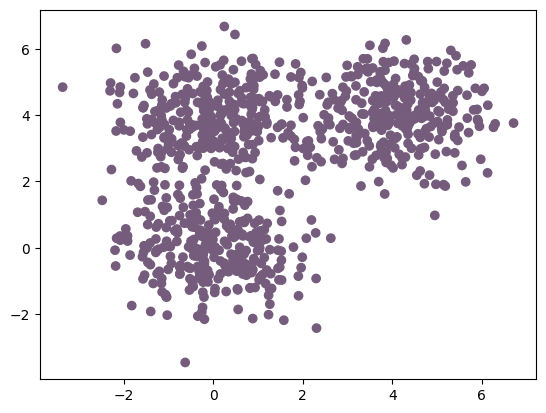

In [42]:
K = 3
plot_k_means(X, K)

C:\Users\sablab\AppData\Local\Temp\ipykernel_3504\388390746.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n, k] = np.exp(-beta*d(M[k], X[n]))/ np.sum(np.exp(-beta*d(M[k], X[n]))for j in range(K))


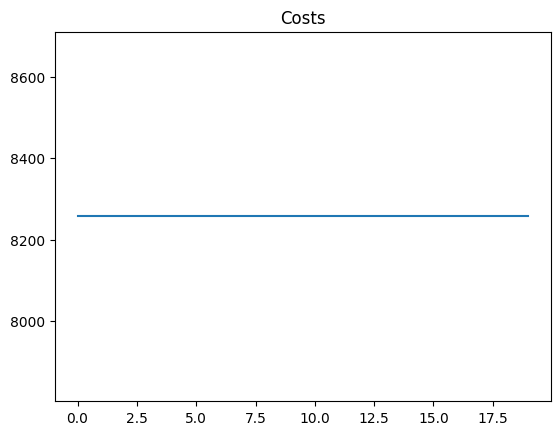

19


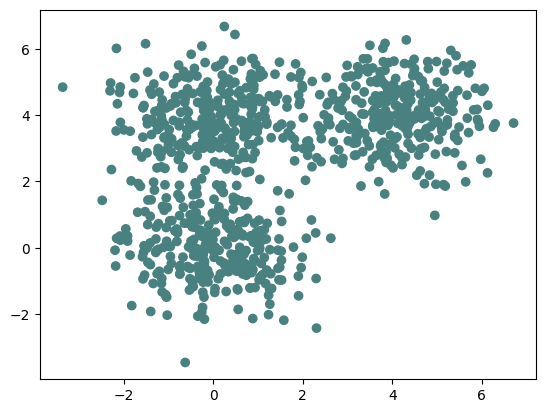

In [43]:
K = 5
plot_k_means(X, K)

C:\Users\sablab\AppData\Local\Temp\ipykernel_3504\3446634409.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n, k] = np.exp(-beta*d(M[k], X[n]))/ np.sum(np.exp(-beta*d(M[k], X[n]))for j in range(K))


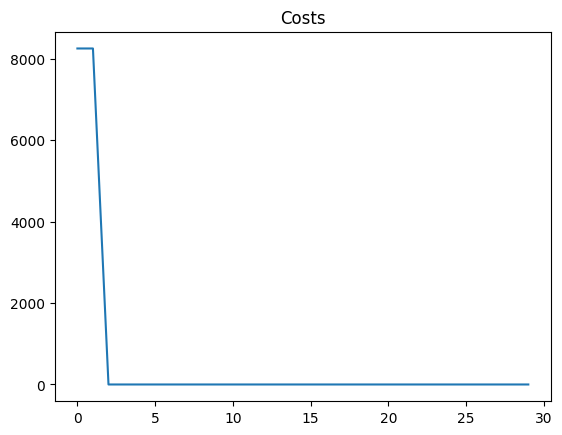

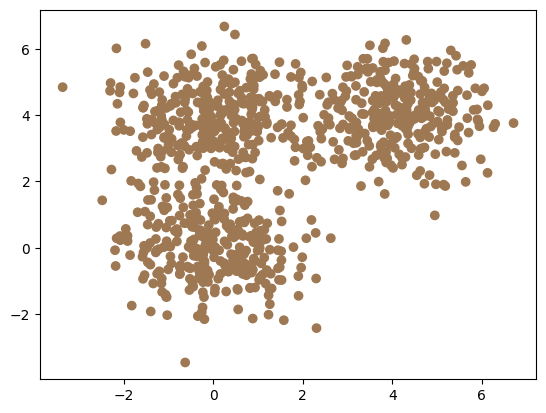

In [28]:
K = 5
plot_k_means(X, K, max_iter=30)